ARD Regression on the Data Set of Developed Country

In [130]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [131]:
df = pd.read_excel("D:/Phd-IIM Raipur/1st Year Mini Dissertation/Data Set/World Bank/Final Data/Developed_Country_Data_WB.xlsx", None)

In [132]:
df.keys()

odict_keys(['USA', 'UK', 'NOR', 'CHE', 'DEU', 'CAN', 'AUS', 'SWE', 'FIN', 'JPN', 'AUT', 'BEL', 'DNK', 'ESP', 'FRA', 'HKG', 'IRL', 'ISL', 'NLD', 'SGP', 'TOTAL', 'Sheet1'])

In [133]:
df = pd.read_excel("D:/Phd-IIM Raipur/1st Year Mini Dissertation/Data Set/World Bank/Final Data/Developed_Country_Data_WB.xlsx", sheet_name='Sheet1')

In [134]:
df.head()

,Country,Country_Code,Category,Year,Air_freight_million_ton_km,Air_passengers_carried,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Logistic_performance,Industry_value_added_current_USD,...,Research_and_development_expenditure_%_of_GDP,Individuals_using_the_Internet_%_of_population,Poverty_headcount_ratio,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business_start_up,Time_to_start_business,New_business_density
0,United Kingdom,GBR,Developed,2006,6215.321000,9.754463e+07,8.434458e+06,106080.000,NaN,5.483257e+11,...,1.58285,68.82,0.2,2913.0,10,NaN,6.0,0.0,11.5,10.047050
1,United Kingdom,GBR,Developed,2007,6154.451000,1.016228e+08,8.625102e+06,34984.864,4.05,6.102081e+11,...,1.62165,75.09,0.3,2588.0,10,NaN,6.0,0.0,11.5,11.153033
2,United Kingdom,GBR,Developed,2008,6283.831000,1.047136e+08,8.236523e+06,12511.867,NaN,5.855809e+11,...,1.62307,78.39,0.3,2415.0,10,NaN,6.0,0.0,11.5,8.867479
3,United Kingdom,GBR,Developed,2009,6615.125000,1.024645e+08,7.671300e+06,NaN,NaN,4.517339e+11,...,1.68250,83.56,0.2,2179.0,10,NaN,6.0,0.0,11.5,8.852136
4,United Kingdom,GBR,Developed,2010,6082.739413,1.015157e+08,7.861006e+06,NaN,3.95,4.669911e+11,...,1.66063,85.00,0.1,2105.0,10,NaN,6.0,0.0,11.5,9.686320


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 31 columns):
Country                                           236 non-null object
Country_Code                                      236 non-null object
Category                                          236 non-null object
Year                                              236 non-null int64
Air_freight_million_ton_km                        197 non-null float64
Air_passengers_carried                            197 non-null float64
Container_port_traffic_TEU                        231 non-null float64
Railways_goods_trans_million_ton-km               109 non-null float64
Logistic_performance                              108 non-null float64
Industry_value_added_current_USD                  231 non-null float64
Manufacturing_value added_%_of_GDP                231 non-null float64
Services_value_added_%_of_GDP                     231 non-null float64
Employment_in_industry_%_of_total_employment    

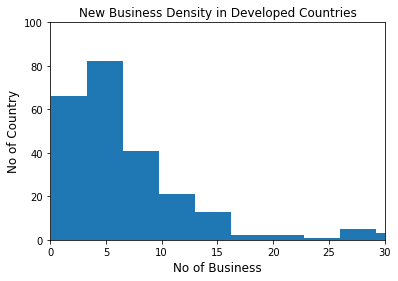

In [136]:
plt.hist((df['New_business_density']), color = '#1f77b4')
plt.xlim(0,30)
plt.ylim(0,100)
plt.xlabel('No of Business',fontsize=12)
plt.ylabel('No of Country', fontsize=12)
plt.title("New Business Density in Developed Countries")
plt.show()

In [137]:
data_points=(df['New_business_density']).to_numpy()

In [138]:
import statsmodels.api as sm 
import pylab as py 

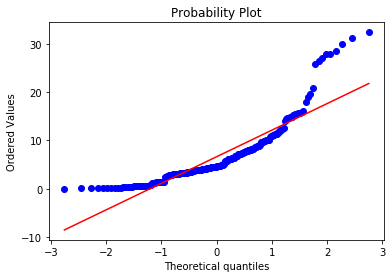

In [139]:
import pylab
stats.probplot(data_points, dist="norm", plot=pylab)
pylab.show()

In [140]:
df["New_business_density"].describe()

count    236.000000
mean       6.630313
std        6.099509
min        0.040801
25%        3.148613
50%        4.600214
75%        8.335607
max       32.437461
Name: New_business_density, dtype: float64

In [141]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [142]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [143]:
df = df.drop(df.columns[[0, 1, 2, 3]], axis=1)

In [144]:
df.head()

,Air_freight_million_ton_km,Air_passengers_carried,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Logistic_performance,Industry_value_added_current_USD,Manufacturing_value added_%_of_GDP,Services_value_added_%_of_GDP,Employment_in_industry_%_of_total_employment,GDP_per_capita_current_USD,...,Research_and_development_expenditure_%_of_GDP,Individuals_using_the_Internet_%_of_population,Poverty_headcount_ratio,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business_start_up,Time_to_start_business,New_business_density
0,6215.321000,9.754463e+07,8.434458e+06,106080.000,NaN,5.483257e+11,10.257824,69.301245,22.062000,44599.697569,...,1.58285,68.82,0.2,2913.0,10,NaN,6.0,0.0,11.5,10.047050
1,6154.451000,1.016228e+08,8.625102e+06,34984.864,4.05,6.102081e+11,9.727962,69.788253,22.188999,50566.826596,...,1.62165,75.09,0.3,2588.0,10,NaN,6.0,0.0,11.5,11.153033
2,6283.831000,1.047136e+08,8.236523e+06,12511.867,NaN,5.855809e+11,9.620166,69.790513,22.004000,47286.998493,...,1.62307,78.39,0.3,2415.0,10,NaN,6.0,0.0,11.5,8.867479
3,6615.125000,1.024645e+08,7.671300e+06,NaN,NaN,4.517339e+11,9.152196,71.610784,19.611000,38713.137428,...,1.68250,83.56,0.2,2179.0,10,NaN,6.0,0.0,11.5,8.852136
4,6082.739413,1.015157e+08,7.861006e+06,NaN,3.95,4.669911e+11,9.550935,70.551904,19.209999,39435.839902,...,1.66063,85.00,0.1,2105.0,10,NaN,6.0,0.0,11.5,9.686320


In [145]:
data=imp.fit_transform(df)

In [146]:
print(data)

[[6.21532100e+03 9.75446310e+07 8.43445800e+06 ... 0.00000000e+00
  1.15000000e+01 1.00470502e+01]
 [6.15445100e+03 1.01622807e+08 8.62510200e+06 ... 0.00000000e+00
  1.15000000e+01 1.11530330e+01]
 [6.28383100e+03 1.04713553e+08 8.23652289e+06 ... 0.00000000e+00
  1.15000000e+01 8.86747857e+00]
 ...
 [6.69581128e+03 3.53703280e+07 3.26680000e+07 ... 0.00000000e+00
  2.50000000e+00 8.01314649e+00]
 [5.06299258e+03 3.80949900e+07 3.36670000e+07 ... 0.00000000e+00
  2.50000000e+00 8.57863953e+00]
 [5.19490042e+03 4.04015150e+07 3.66000000e+07 ... 0.00000000e+00
  1.50000000e+00 1.00107885e+01]]


In [147]:
dataset=pd.DataFrame({'Air_freight': data[:, 0], 'Air_passenger': data[:, 1], 'Container_traffic': data[:, 2], 'Railway_transport': data[:, 3],
                       'Logistic_performance': data[:, 4], 'Industry_valueadded': data[:, 5],'Mfg_valueadded': data[:, 6], 'Service_valueadded': data[:, 7],
                       'Emp_in_industry': data[:, 8], 'GDP_per_capita': data[:, 9],'Final_consumption': data[:, 10], 'Primary_completion': data[:, 11],
                       'Edu_attainment': data[:, 12], 'Hightech_export': data[:, 13],'Treadmark_appl': data[:, 14], 'Patent_appl': data[:, 15],
                       'Scientific_journal': data[:, 16], 'R&D_exp': data[:, 17],'Individual_using_internet': data[:, 18], 'Poverty_headcount': data[:, 19],
                      'Listed_companies': data[:, 20],'Business_disclosure': data[:, 21],'Ease_of_doing_business': data[:, 22],
                       'Start_up_procedure': data[:, 23],'Cost_of_business': data[:, 24],
                      'Time_to_start_business': data[:, 25],'New_business_density': data[:, 26]})

In [148]:
dataset.head()

,Air_freight,Air_passenger,Container_traffic,Railway_transport,Logistic_performance,Industry_valueadded,Mfg_valueadded,Service_valueadded,Emp_in_industry,GDP_per_capita,...,R&D_exp,Individual_using_internet,Poverty_headcount,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business,Time_to_start_business,New_business_density
0,6215.321000,9.754463e+07,8.434458e+06,106080.000000,4.018773,5.483257e+11,10.257824,69.301245,22.062000,44599.697569,...,1.58285,68.82,0.2,2913.0,10.0,85.864098,6.0,0.0,11.5,10.047050
1,6154.451000,1.016228e+08,8.625102e+06,34984.864000,4.050000,6.102081e+11,9.727962,69.788253,22.188999,50566.826596,...,1.62165,75.09,0.3,2588.0,10.0,86.057750,6.0,0.0,11.5,11.153033
2,6283.831000,1.047136e+08,8.236523e+06,12511.867000,4.059118,5.855809e+11,9.620166,69.790513,22.004000,47286.998493,...,1.62307,78.39,0.3,2415.0,10.0,85.620366,6.0,0.0,11.5,8.867479
3,6615.125000,1.024645e+08,7.671300e+06,25703.848664,4.105597,4.517339e+11,9.152196,71.610784,19.611000,38713.137428,...,1.68250,83.56,0.2,2179.0,10.0,83.388726,6.0,0.0,11.5,8.852136
4,6082.739413,1.015157e+08,7.861006e+06,29054.860111,3.950000,4.669911e+11,9.550935,70.551904,19.209999,39435.839902,...,1.66063,85.00,0.1,2105.0,10.0,84.685869,6.0,0.0,11.5,9.686320


In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 27 columns):
Air_freight                  236 non-null float64
Air_passenger                236 non-null float64
Container_traffic            236 non-null float64
Railway_transport            236 non-null float64
Logistic_performance         236 non-null float64
Industry_valueadded          236 non-null float64
Mfg_valueadded               236 non-null float64
Service_valueadded           236 non-null float64
Emp_in_industry              236 non-null float64
GDP_per_capita               236 non-null float64
Final_consumption            236 non-null float64
Primary_completion           236 non-null float64
Edu_attainment               236 non-null float64
Hightech_export              236 non-null float64
Treadmark_appl               236 non-null float64
Patent_appl                  236 non-null float64
Scientific_journal           236 non-null float64
R&D_exp                      236 non-null flo

In [150]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(dataset.values)

In [151]:
scaled_features_df = pd.DataFrame(scaled_features, index=dataset.index, columns=dataset.columns)

In [152]:
scaled_features_df.head()

,Air_freight,Air_passenger,Container_traffic,Railway_transport,Logistic_performance,Industry_valueadded,Mfg_valueadded,Service_valueadded,Emp_in_industry,GDP_per_capita,...,R&D_exp,Individual_using_internet,Poverty_headcount,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business,Time_to_start_business,New_business_density
0,0.857239,1.285400,-0.037768,4.090246,0.227236,0.720255,-0.567827,0.391210,0.237437,-0.448515,...,-0.909354,-1.385917,-0.077260,1.896459,1.290605,2.217358,0.375675,-0.827908,0.050929,0.561357
1,0.839192,1.392285,-0.016589,0.842321,0.368226,0.890211,-0.658208,0.455840,0.270574,-0.041464,...,-0.858063,-0.761770,0.333741,1.595398,1.290605,2.283763,0.375675,-0.827908,0.050929,0.743065
2,0.877551,1.473291,-0.059757,-0.184340,0.409395,0.822574,-0.676595,0.456140,0.222303,-0.265199,...,-0.856186,-0.433272,0.333741,1.435142,1.290605,2.133781,0.375675,-0.827908,0.050929,0.367558
3,0.975773,1.414346,-0.122549,0.418325,0.619247,0.454972,-0.756420,0.697708,-0.402092,-0.850069,...,-0.777624,0.081376,-0.077260,1.216526,1.290605,1.368538,0.375675,-0.827908,0.050929,0.365037
4,0.817931,1.389479,-0.101474,0.571414,-0.083270,0.496875,-0.688405,0.557185,-0.506724,-0.800769,...,-0.806534,0.224720,-0.488261,1.147977,1.290605,1.813336,0.375675,-0.827908,0.050929,0.502090


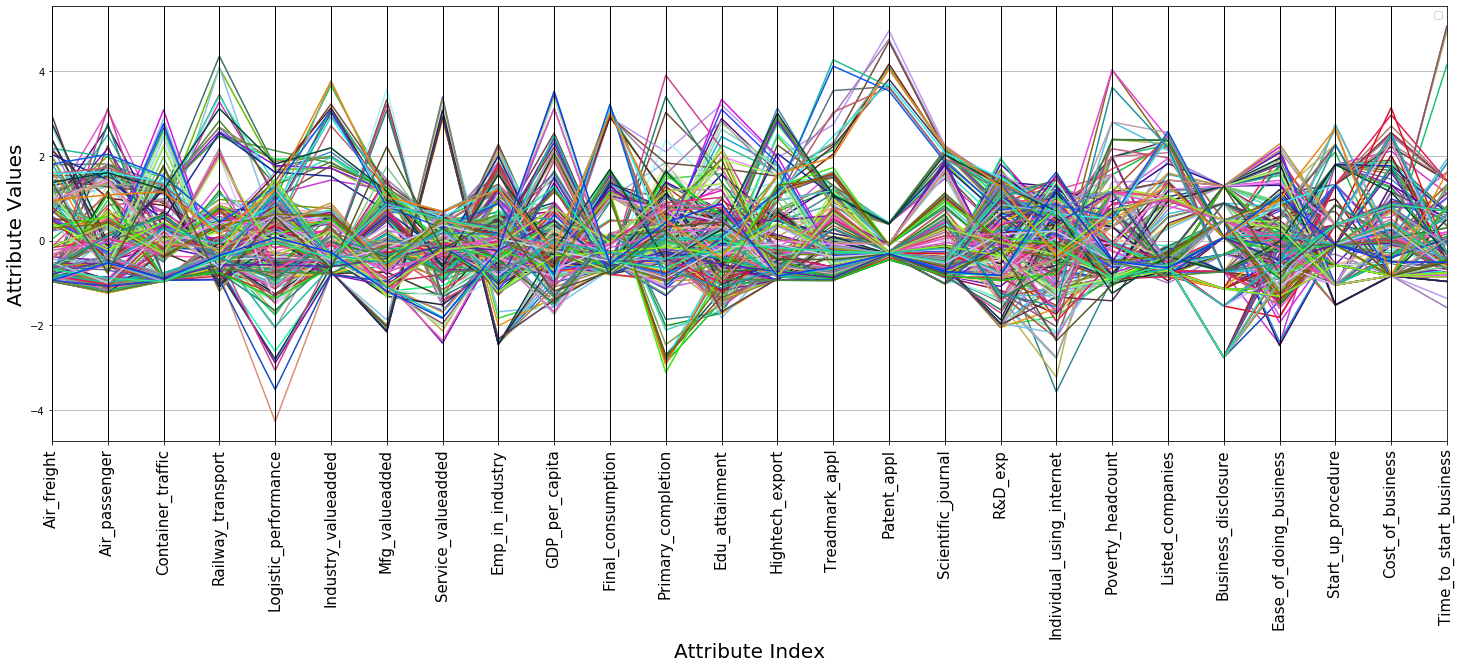

In [153]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(25,8))
random_subset = scaled_features_df.sample(n=236)

pd.plotting.parallel_coordinates(
    random_subset[['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport','Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                      'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                      'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                      'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                    'Listed_companies','Business_disclosure','Ease_of_doing_business',
                      'Start_up_procedure','Cost_of_business',
                     'Time_to_start_business','New_business_density']],'New_business_density')

plt.xlabel("Attribute Index",fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel("Attribute Values", fontsize=20)
plt.legend('')
plt.show()

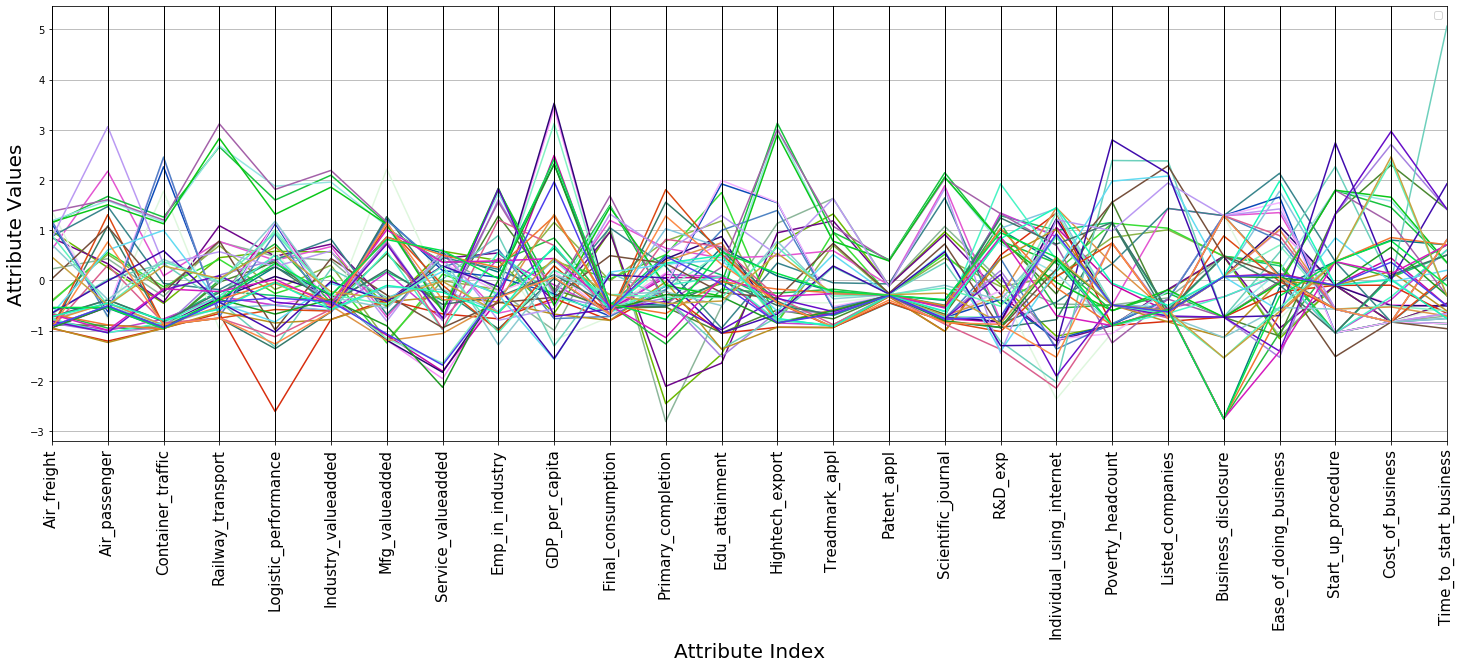

In [154]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(25,8))
random_subset = scaled_features_df.sample(n=50)

pd.plotting.parallel_coordinates(
    random_subset[['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport','Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                      'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                      'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                      'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                    'Listed_companies','Business_disclosure','Ease_of_doing_business',
                      'Start_up_procedure','Cost_of_business',
                     'Time_to_start_business','New_business_density']],'New_business_density')

plt.xlabel("Attribute Index",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel("Attribute Values", fontsize=20)
plt.legend('')
plt.show()

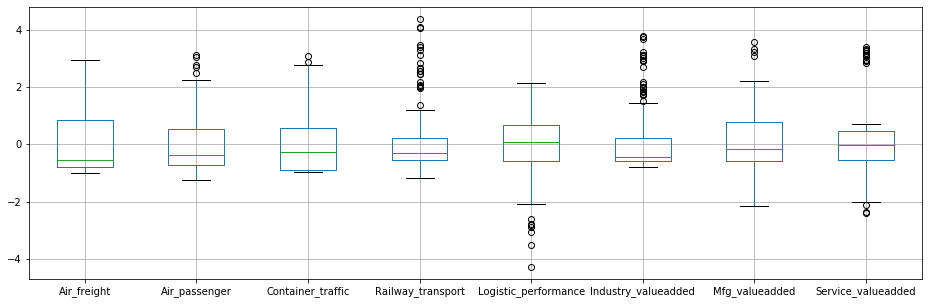

In [155]:
plt.figure(figsize=(16,5))
boxplot = scaled_features_df.boxplot(column=['Air_freight', 'Air_passenger', 'Container_traffic', 
                    'Railway_transport','Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded'])

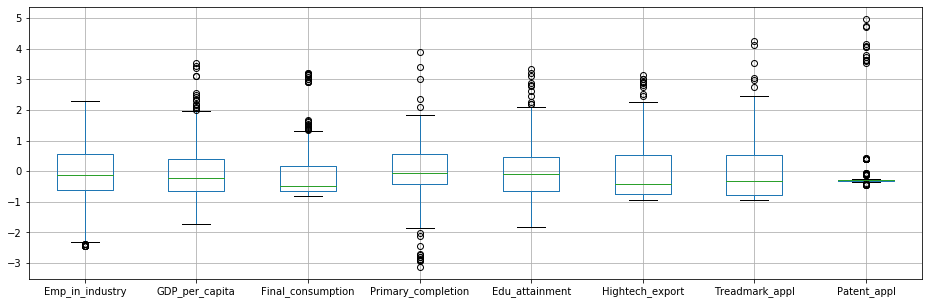

In [156]:
plt.figure(figsize=(16,5))
boxplot = scaled_features_df.boxplot(column=['Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                      'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl'])

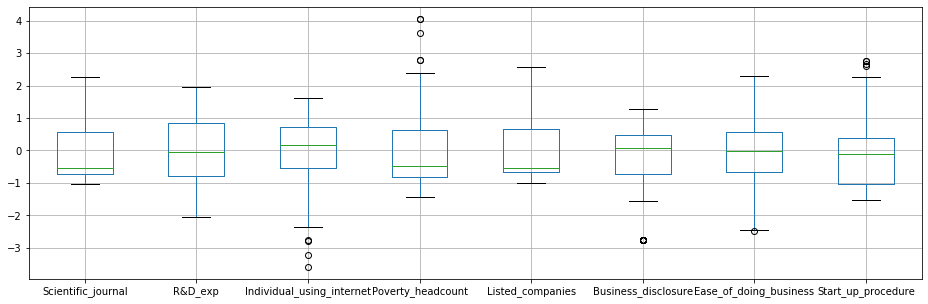

In [157]:
plt.figure(figsize=(16,5))
boxplot = scaled_features_df.boxplot(column=['Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                    'Listed_companies','Business_disclosure','Ease_of_doing_business',
                      'Start_up_procedure'])
                      

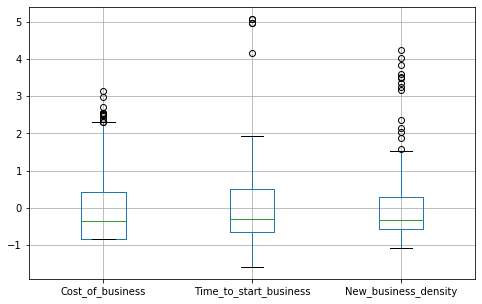

In [158]:
plt.figure(figsize=(8,5))
boxplot = scaled_features_df.boxplot(column=['Cost_of_business','Time_to_start_business','New_business_density'])

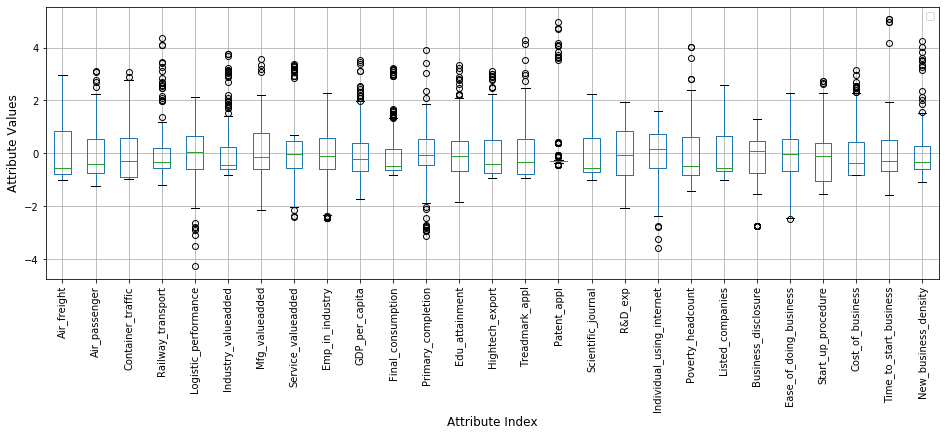

In [159]:
plt.figure(figsize=(16,5))
boxplot = scaled_features_df.boxplot(column=['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport',
                       'Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                       'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                       'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                       'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                      'Listed_companies','Business_disclosure','Ease_of_doing_business',
                       'Start_up_procedure','Cost_of_business',
                      'Time_to_start_business','New_business_density'])
plt.xlabel("Attribute Index",fontsize=12)
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Attribute Values", fontsize=12)
plt.legend('')
plt.show()

In [160]:
x=dataset[['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport',
                       'Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                       'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                       'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                       'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                      'Listed_companies','Business_disclosure','Ease_of_doing_business',
                       'Start_up_procedure','Cost_of_business',
                      'Time_to_start_business']]
y=dataset['New_business_density']

In [161]:
x_norm = (x - x.mean()) / x.std()

In [162]:
y_norm = (y - y.mean()) / y.std()

In [163]:
train_norm_x,test_norm_x,train_norm_y,test_norm_y=train_test_split(x_norm,y_norm,test_size=0.3,random_state=50)

Regression Metrices on Train Data R2:0.910, MAE:0.219,MSE:0.078, RMSE:0.280
Regression Metrices on Test Data R2:0.903, MAE:0.267,MSE:0.124, RMSE:0.352


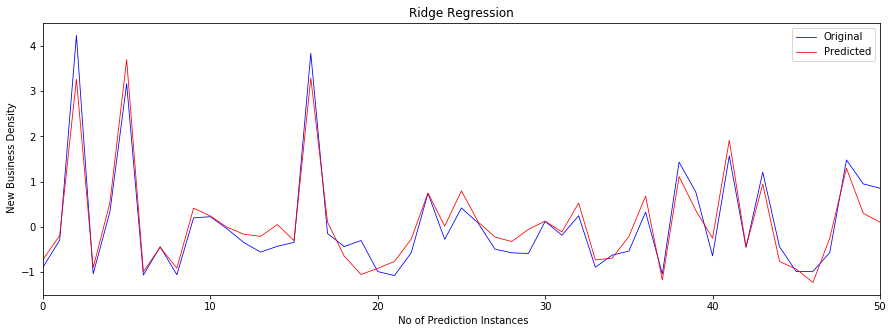

In [164]:
model_Ridge = linear_model.Ridge()
model = model_Ridge.fit(train_norm_x, train_norm_y)
ypred_train_Ridge = model.predict(train_norm_x)
ypred_test_Ridge = model.predict(test_norm_x)
score_train_Ridge = model_Ridge.score(train_norm_x, train_norm_y)
mae_train_Ridge=mean_absolute_error(train_norm_y, ypred_train_Ridge)
mse_train_Ridge = mean_squared_error(train_norm_y, ypred_train_Ridge)
print("Regression Metrices on Train Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_train_Ridge, mae_train_Ridge, mse_train_Ridge, np.sqrt(mse_train_Ridge)))

score_test_Ridge = model.score(test_norm_x, test_norm_y)
mae_test_Ridge=mean_absolute_error(test_norm_y, ypred_test_Ridge)
mse_test_Ridge = mean_squared_error(test_norm_y, ypred_test_Ridge)
print("Regression Metrices on Test Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_test_Ridge, mae_test_Ridge, mse_test_Ridge, np.sqrt(mse_test_Ridge)))
x_ax = range(len(test_norm_x))
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_Ridge, lw=0.8, color="red", label="Predicted")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("Ridge Regression")
plt.show()

Regression Metrices on Train Data R2:0.000, MAE:0.658,MSE:0.872, RMSE:0.934
Regression Metrices on Test Data R2:-0.009, MAE:0.782,MSE:1.287, RMSE:1.134


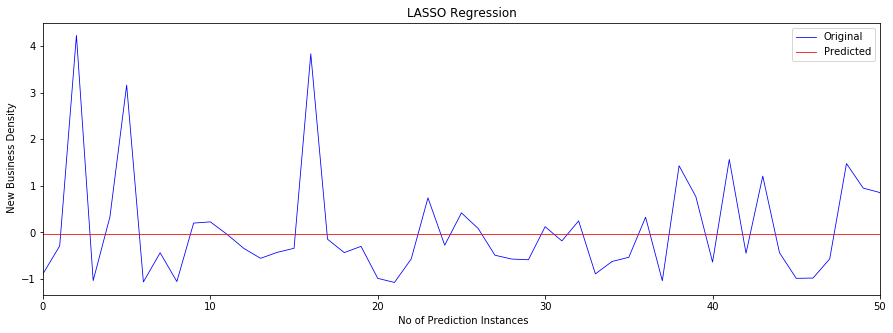

In [165]:
model_Lasso = linear_model.Lasso()
model = model_Lasso.fit(train_norm_x, train_norm_y)
ypred_train_Lasso = model.predict(train_norm_x)
ypred_test_Lasso = model.predict(test_norm_x)
score_train_Lasso = model_Lasso.score(train_norm_x, train_norm_y)
mae_train_Lasso=mean_absolute_error(train_norm_y, ypred_train_Lasso)
mse_train_Lasso = mean_squared_error(train_norm_y, ypred_train_Lasso)
print("Regression Metrices on Train Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_train_Lasso, mae_train_Lasso, mse_train_Lasso, np.sqrt(mse_train_Lasso)))

score_test_Lasso = model.score(test_norm_x, test_norm_y)
mae_test_Lasso=mean_absolute_error(test_norm_y, ypred_test_Lasso)
mse_test_Lasso = mean_squared_error(test_norm_y, ypred_test_Lasso)
print("Regression Metrices on Test Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_test_Lasso, mae_test_Lasso, mse_test_Lasso, np.sqrt(mse_test_Lasso)))
x_ax = range(len(test_norm_x))
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_Lasso, lw=0.8, color="red", label="Predicted")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("LASSO Regression")
plt.show()

Regression Metrices on Train Data R2:0.126, MAE:0.619,MSE:0.762, RMSE:0.873
Regression Metrices on Test Data R2:0.123, MAE:0.724,MSE:1.118, RMSE:1.057


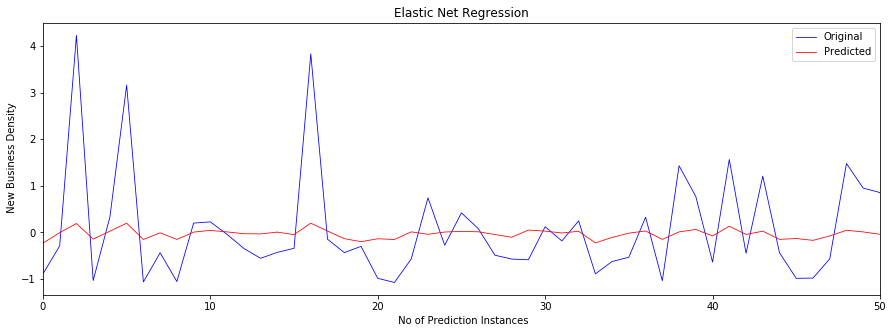

In [166]:
model_ElasticNet = linear_model.ElasticNet()
model = model_ElasticNet.fit(train_norm_x, train_norm_y)
ypred_train_ElasticNet = model.predict(train_norm_x)
ypred_test_ElasticNet = model.predict(test_norm_x)
score_train_ElasticNet = model_ElasticNet.score(train_norm_x, train_norm_y)
mae_train_ElasticNet=mean_absolute_error(train_norm_y, ypred_train_ElasticNet)
mse_train_ElasticNet = mean_squared_error(train_norm_y, ypred_train_ElasticNet)
print("Regression Metrices on Train Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_train_ElasticNet, mae_train_ElasticNet, mse_train_ElasticNet, np.sqrt(mse_train_ElasticNet)))

score_test_ElasticNet = model.score(test_norm_x, test_norm_y)
mae_test_ElasticNet=mean_absolute_error(test_norm_y, ypred_test_ElasticNet)
mse_test_ElasticNet = mean_squared_error(test_norm_y, ypred_test_ElasticNet)
print("Regression Metrices on Test Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_test_ElasticNet, mae_test_ElasticNet, mse_test_ElasticNet, np.sqrt(mse_test_ElasticNet)))
x_ax = range(len(test_norm_x))
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_ElasticNet, lw=0.8, color="red", label="Predicted")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("Elastic Net Regression")
plt.show()

Regression Metrices on Train Data R2:-9.808, MAE:2.370,MSE:9.426, RMSE:3.070
Regression Metrices on Test Data R2:-11.214, MAE:2.935,MSE:15.575, RMSE:3.947


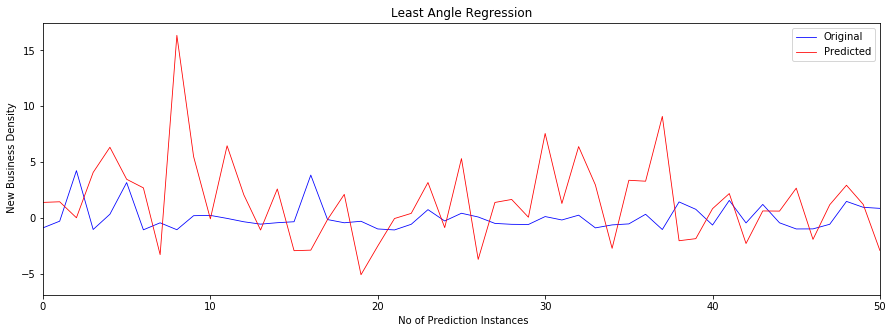

In [167]:
model_LAR = linear_model.Lars()
model = model_LAR.fit(train_norm_x, train_norm_y)
ypred_train_LAR = model.predict(train_norm_x)
ypred_test_LAR = model.predict(test_norm_x)
score_train_LAR = model_LAR.score(train_norm_x, train_norm_y)
mae_train_LAR=mean_absolute_error(train_norm_y, ypred_train_LAR)
mse_train_LAR = mean_squared_error(train_norm_y, ypred_train_LAR)
print("Regression Metrices on Train Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_train_LAR, mae_train_LAR, mse_train_LAR, np.sqrt(mse_train_LAR)))

score_test_LAR = model.score(test_norm_x, test_norm_y)
mae_test_LAR=mean_absolute_error(test_norm_y, ypred_test_LAR)
mse_test_LAR = mean_squared_error(test_norm_y, ypred_test_LAR)
print("Regression Metrices on Test Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_test_LAR, mae_test_LAR, mse_test_LAR, np.sqrt(mse_test_LAR)))
x_ax = range(len(test_norm_x))
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_LAR, lw=0.8, color="red", label="Predicted")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("Least Angle Regression")
plt.show()

Regression Metrices on Train Data R2:0.934, MAE:0.174,MSE:0.057, RMSE:0.239
Regression Metrices on Test Data R2:0.926, MAE:0.230,MSE:0.094, RMSE:0.307


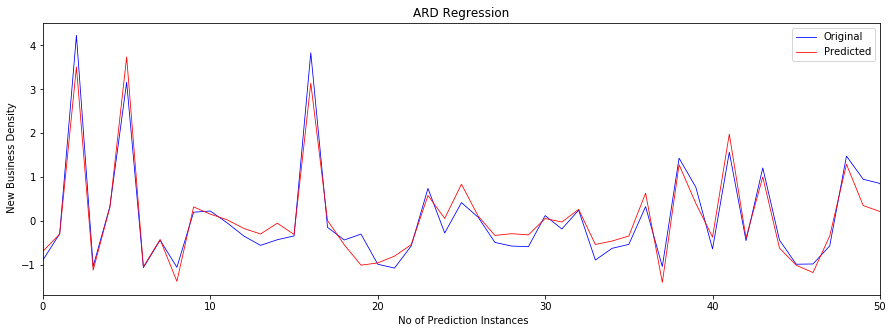

In [168]:
model_ARD = linear_model.ARDRegression()
model = model_ARD.fit(train_norm_x, train_norm_y)
ypred_train_ARD = model.predict(train_norm_x)
ypred_test_ARD = model.predict(test_norm_x)
score_train_ARD = model_ARD.score(train_norm_x, train_norm_y)
mae_train_ARD=mean_absolute_error(train_norm_y, ypred_train_ARD)
mse_train_ARD = mean_squared_error(train_norm_y, ypred_train_ARD)
print("Regression Metrices on Train Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_train_ARD, mae_train_ARD, mse_train_ARD, np.sqrt(mse_train_ARD)))

score_test_ARD = model.score(test_norm_x, test_norm_y)
mae_test_ARD=mean_absolute_error(test_norm_y, ypred_test_ARD)
mse_test_ARD = mean_squared_error(test_norm_y, ypred_test_ARD)
print("Regression Metrices on Test Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_test_ARD, mae_test_ARD, mse_test_ARD, np.sqrt(mse_test_ARD)))
x_ax = range(len(test_norm_x))
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_ARD, lw=0.8, color="red", label="Predicted")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("ARD Regression")
plt.show()

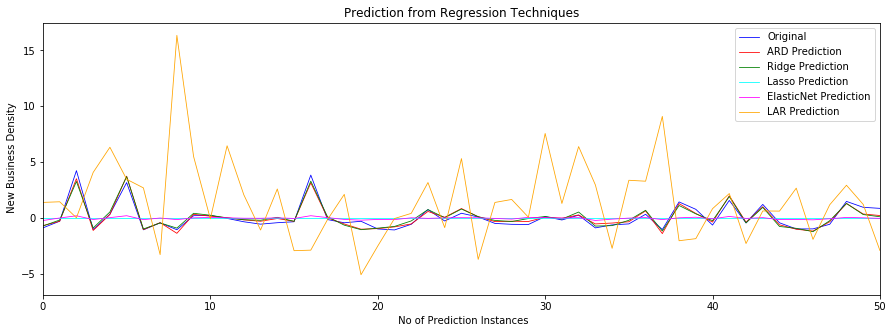

In [169]:
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_ARD, lw=0.8, color="red", label="ARD Prediction")
plt.plot(x_ax, ypred_test_Ridge, lw=0.8, color="green", label="Ridge Prediction")
plt.plot(x_ax, ypred_test_Lasso, lw=0.8, color="cyan", label="Lasso Prediction")
plt.plot(x_ax, ypred_test_ElasticNet, lw=0.8, color="magenta", label="ElasticNet Prediction")
plt.plot(x_ax, ypred_test_LAR, lw=0.8, color="orange", label="LAR Prediction")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("Prediction from Regression Techniques")
plt.show()

In [170]:
print ('Coefficients: ', model_ARD.coef_)

Coefficients:  [-3.12613737e-01  5.56041794e-01  8.49064826e-01  2.92467713e-01
 -7.37597828e-02 -1.10216974e+00 -3.48438413e-03  2.83770628e-01
  0.00000000e+00  2.61386130e-01 -2.48585745e+00 -1.17676597e-03
 -6.49916552e-01 -9.55505301e-01  1.21160883e+00  1.12789624e+00
  2.00477702e+00  0.00000000e+00  2.02618720e-02 -1.37096240e-01
 -9.16036957e-01  0.00000000e+00  6.64805805e-01 -1.81151407e-01
  4.50815841e-03  0.00000000e+00]


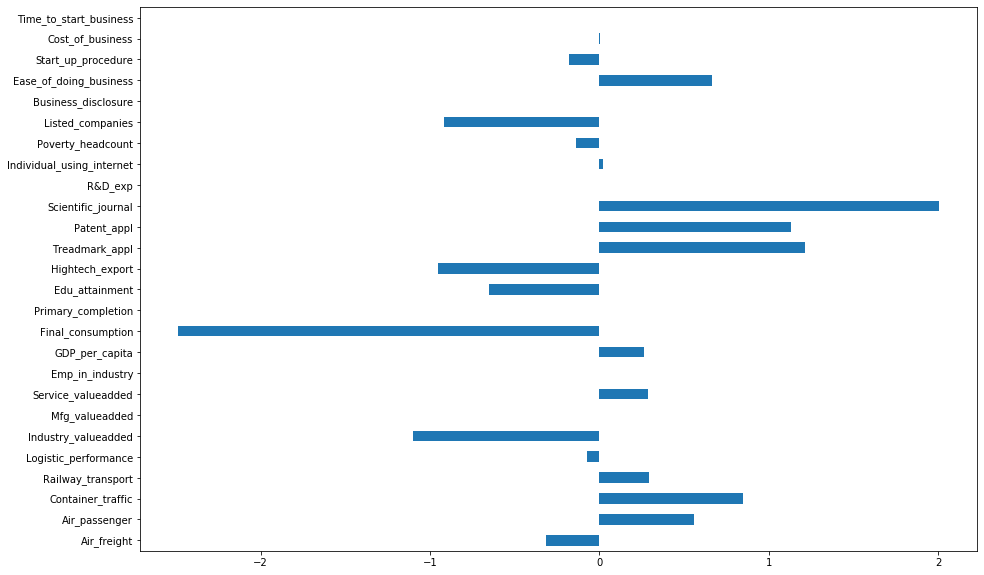

In [171]:
plt.figure(figsize=(15,10))
ft_importance_ARD=pd.Series(model_ARD.coef_,index=x.columns)
ft_importance_ARD.plot(kind='barh')
plt.show()

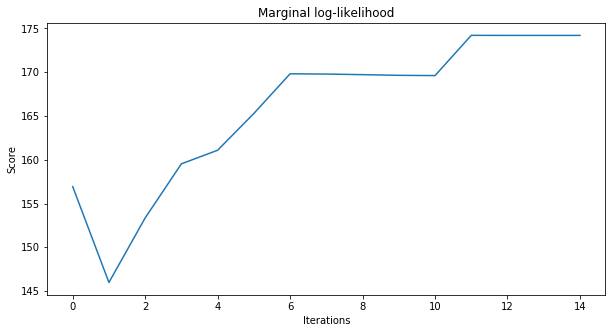

In [172]:
model_ARD= linear_model.ARDRegression(compute_score=True)
model_ARD.fit(x_norm, y_norm)
plt.figure(figsize=(10, 5))
plt.title("Marginal log-likelihood")
plt.plot(model_ARD.scores_)
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()

In [173]:
Error=ypred_test_ARD-test_norm_y

In [174]:
df = pd.DataFrame({'Actual': test_norm_y, 'Predicted': ypred_test_ARD, 'Error': Error})
df.head()

,Actual,Predicted,Error
40,-0.890800,-0.690440,0.200359
135,-0.290987,-0.299240,-0.008253
178,4.231021,3.509652,-0.721369
103,-1.035926,-1.122134,-0.086208
24,0.330854,0.310933,-0.019921


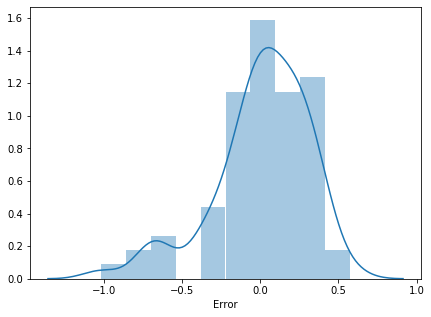

In [175]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.tight_layout()
sns.distplot(df['Error'])

In [176]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import ARDRegression

In [177]:
# Feature extraction
model = ARDRegression()
rfe = RFE(model, 10)
fit = rfe.fit(x_norm, y_norm)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False False  True False False  True False False False False  True False
  True  True  True  True  True False False False  True False  True False
 False False]
Feature Ranking: [ 6  2  1  4 11  1 13  3 14  5  1  9  1  1  1  1  1 16 10  8  1 17  1  7
 15 12]


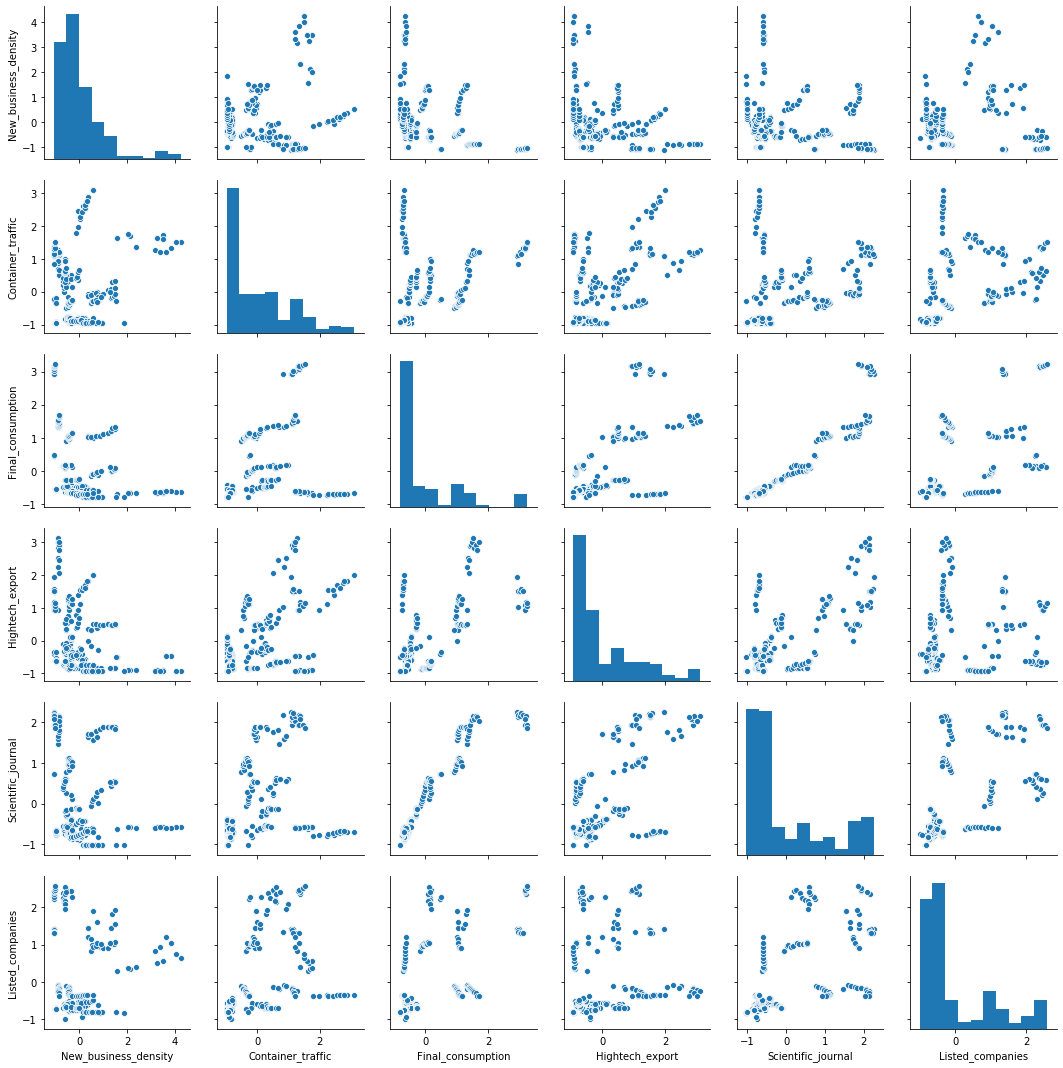

In [178]:
sns.pairplot(scaled_features_df[['New_business_density', 'Container_traffic', 'Final_consumption', 'Hightech_export', 'Scientific_journal', 'Listed_companies']])

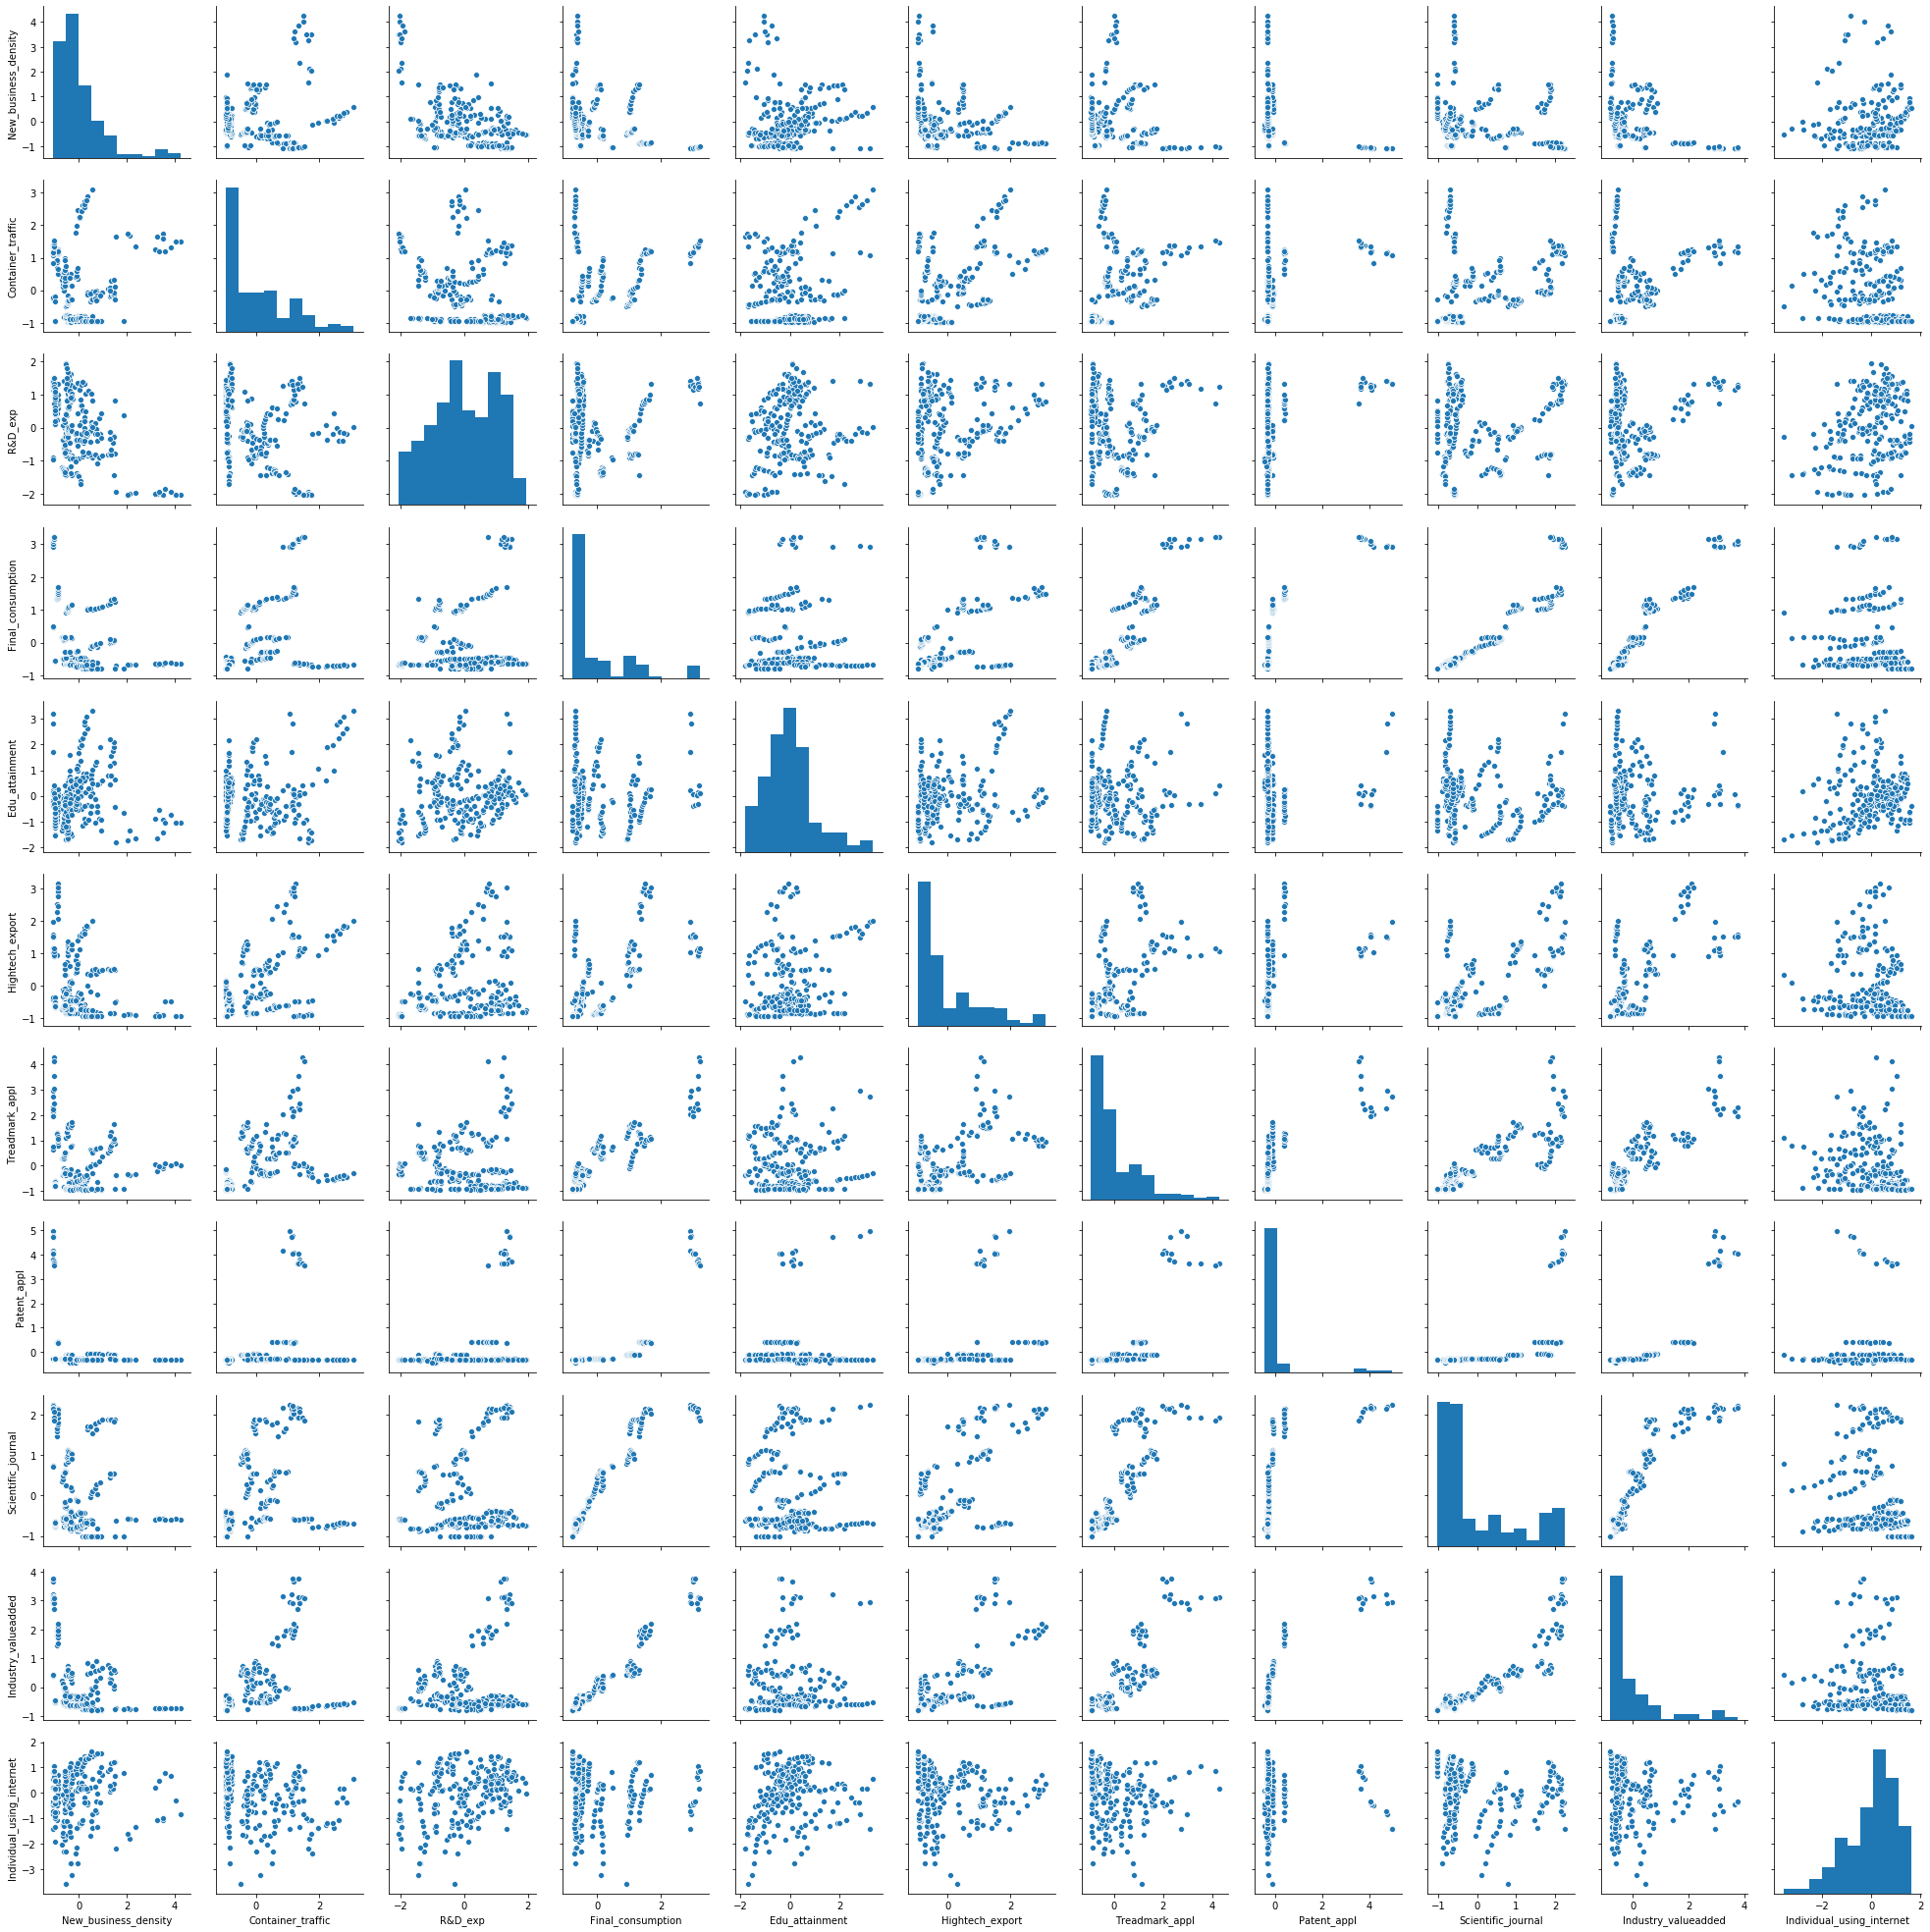

In [179]:
sns.pairplot(scaled_features_df[['New_business_density', 'Container_traffic','R&D_exp','Final_consumption','Edu_attainment','Hightech_export',
                                'Treadmark_appl','Patent_appl','Scientific_journal','Industry_valueadded','Individual_using_internet']])


In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Lars
from math import log
from sklearn.metrics import mean_squared_error

In [181]:
# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic

In [182]:

# define and fit the model on all data
model = ARDRegression()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y_norm), mse, num_params)
print('AIC: %.3f' % aic)


Number of parameters: 27
MSE: 0.061
AIC: -605.783


In [183]:
# define and fit the model on all data
model = Ridge()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y_norm), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 27
MSE: 0.080
AIC: -540.733


In [184]:
# define and fit the model on all data
model = Lasso()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y_norm), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 27
MSE: 0.996
AIC: 52.998


In [185]:
# define and fit the model on all data
model = ElasticNet()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y_norm), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 27
MSE: 0.775
AIC: -6.046


In [186]:
# define and fit the model on all data
model = Lars()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y_norm), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 27
MSE: 6.498
AIC: 495.668


In [187]:
# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

In [188]:
# define and fit the model on all data
model = ARDRegression()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y_norm), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 27
MSE: 0.061
BIC: -512.259


In [189]:
# define and fit the model on all data
model = Ridge()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y_norm), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 27
MSE: 0.080
BIC: -447.210


In [190]:
# define and fit the model on all data
model = Lasso()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y_norm), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 27
MSE: 0.996
BIC: 146.521


In [191]:
# define and fit the model on all data
model = ElasticNet()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y_norm), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 27
MSE: 0.775
BIC: 87.477


In [192]:
# define and fit the model on all data
model = Lars()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y_norm), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 27
MSE: 6.498
BIC: 589.192
